# Matrix Factorization using Bregman Divergenses

## Testing NMF class

In [270]:
from sklearn.decomposition import NMF as nmfsk
from MatrixFactorization import NMF as nmfmy
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error
from math import sqrt

## 1. Poisson Distribution (with kullback-leibler as the Divergense Function To be Minimized)

### 1.1 Selecting best way to represent Poisson Distribution with Non- negative Values

Poission Distribution from definition does not take negative values since it is a discrete probability distribution. 

/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


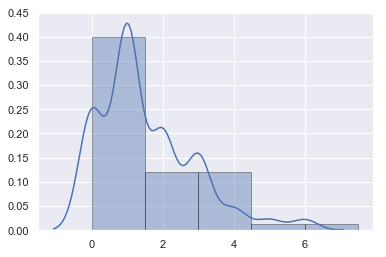

In [271]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
rs = RandomState(76321654)
l = 1.5
V = rs.poisson(lam = 1.5, size = 10000).reshape(200,50)
sns.set(color_codes=True)
sns.distplot(V[4],  bins=np.arange(V[4].min(),V[4].max()) * l, hist_kws=dict(ec="k"), label = 'V')

### 1.2 Test NMF for Data coming from Poisson Distribution

In [272]:
import scipy
V = rs.poisson(lam = 1.5, size = 10000).reshape(200,50)
n = 10
poisson = scipy.stats.distributions.poisson

#### LOG Likelihood 

In [273]:
def neg_log_poisson(V,W,H):
    logs_likelihoods = poisson.logcdf(V, W.dot(H))
    neg_logs = - logs_likelihoods
    return np.sum(neg_logs)

### Sklearn Implementation

In [274]:
rs = RandomState(76321654)
nmfS = nmfsk(n_components=n,random_state=rs, beta_loss = 'kullback-leibler', solver = 'mu' )
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_

diffS = neg_log_poisson(V, Ws, Hs)
print('Neg Log Likelihood Between Sklearn Results and V :' + str(diffS))

Neg Log Likelihood Between Sklearn Results and V :5226.583970101902


### My Implementation

In [275]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'poisson')
W, H = nmfM.fit_transform(V)
diffM = neg_log_poisson(V, W, H)
print('Neg Log Likelihood Between My Results and V :' + str(diffM))

Neg Log Likelihood Between My Results and V :5106.958995320336


### My Implementation Gaussian

In [276]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gaussian')
W, H = nmfM.fit_transform(V)
diffM = neg_log_poisson(V, W, H)
print('Neg Log Likelihood Between My Results and V :' + str(diffM))

Neg Log Likelihood Between My Results and V :5229.136829493342


### Combination of My and Sklearn

In [277]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'poisson')
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_

diffM2 =neg_log_poisson(V, W2, H2)
print('Neg Log Likelihood Between My Results and V :' + str(diffM2))

Neg Log Likelihood Between My Results and V :5224.59248472285


### Compare the three Approaches

In [278]:
errorssk = np.zeros(50)
errorssk2 = np.zeros(50)
errorsmy = np.zeros(50)
errorsmy2 = np.zeros(50)

lsk = np.zeros(50)
lsk2 = np.zeros(50)
lmy = np.zeros(50)
lmy2 = np.zeros(50)



# Compare with normal 
errorsmyNormal = np.zeros(50)
lmyNormal = np.zeros(50)

for n in range(1, 51):
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Sklearn with kullback-leibler
    rs = RandomState(76321654)
    nmfS2 = nmfsk(n_components=n,random_state=rs,  solver='mu', beta_loss='kullback-leibler')
    Ws2 = nmfS2.fit_transform(V)
    Hs2 = nmfS2.components_

    
    
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'poisson')
    W, H = nmfM.fit_transform(V)
    
    # My with Normal
    rs = RandomState(76321654)
    nmfMNormal = nmfmy(n_components=n,random_state=rs,  distribution = 'gaussian')
    Wnormal, Hnormal = nmfMNormal.fit_transform(V)
   
    
    #Combination
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'poisson')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
    diffS2 = mean_squared_error(V, Ws2.dot(Hs2))
    errorssk2[n-1] = diffS2
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
    diffMnormal = mean_squared_error(V, Wnormal.dot(Hnormal))
    errorsmyNormal[n-1] = diffMnormal
    
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsmy2[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_poisson(V, Ws, Hs)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    diffS2 = neg_log_poisson(V, Ws2, Hs2)
    lsk2[n-1] = diffS2 / (V.shape[0] * V.shape[1])
    
    diffM = neg_log_poisson(V, W, H)
    lmy[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffMNormal = neg_log_poisson(V, Wnormal, Hnormal)
    lmyNormal[n-1] = diffMNormal / (V.shape[0] * V.shape[1])
    
    diffM2 = neg_log_poisson(V, W2 , H2)
    lmy2[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    

/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached

In [279]:
lmyNormal

array([0.58660631, 0.57612424, 0.56655939, 0.55837757, 0.55154334,
       0.54662679, 0.53943675, 0.53366332, 0.52732889, 0.52291368,
       0.51879507, 0.51475862, 0.51053284, 0.50715846, 0.50236204,
       0.49652969, 0.4912445 , 0.48755925, 0.48164585, 0.48096433,
       0.47319941, 0.46926691, 0.46724297, 0.46313365, 0.45324335,
       0.44950446, 0.45178159, 0.44678948, 0.44586701, 0.43994612,
       0.4243671 , 0.42678805, 0.41720094, 0.4181721 , 0.41639162,
       0.41086911, 0.39980348, 0.39575437, 0.39371463, 0.38558807,
       0.39546763, 0.37173724, 0.38320871, 0.36734141, 0.36247795,
       0.35597157, 0.35005626, 0.35114825, 0.3375232 , 0.32838582])

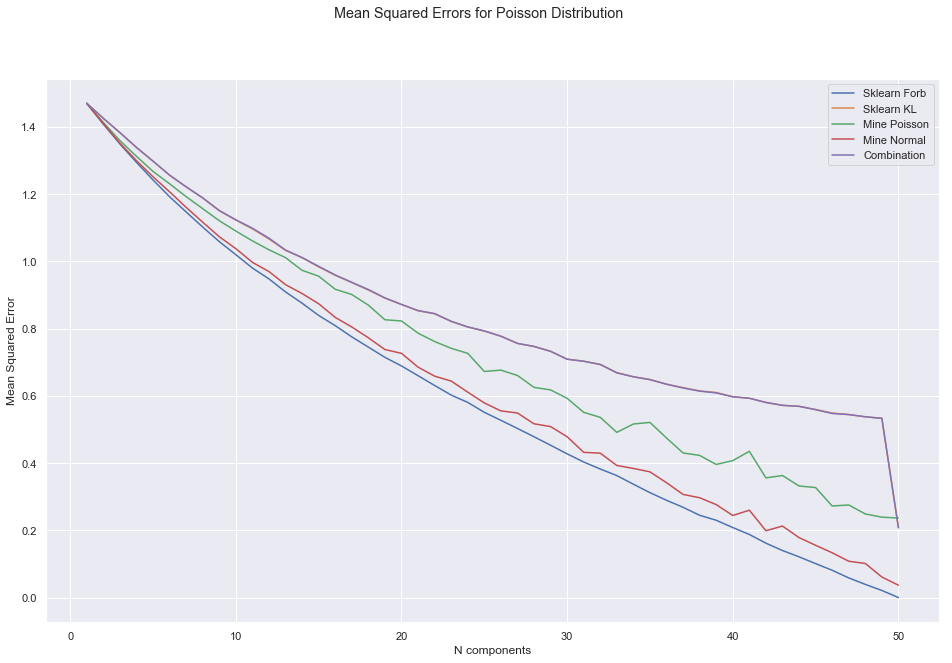

In [280]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb")
ax_1.plot(np.arange(1, 51), 
                  errorssk2, label="Sklearn KL")
ax_1.plot(np.arange(1, 51), 
                  errorsmy, label="Mine Poisson")
ax_1.plot(np.arange(1, 51), 
                  errorsmyNormal, label="Mine Normal")
ax_1.plot(np.arange(1, 51), 
                  errorsmy2, label="Combination")
ax_1.legend(loc=0)

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Poisson Distribution')
fig_1.savefig('MeanSquaredErrorsForNMFPoisson1.pdf')

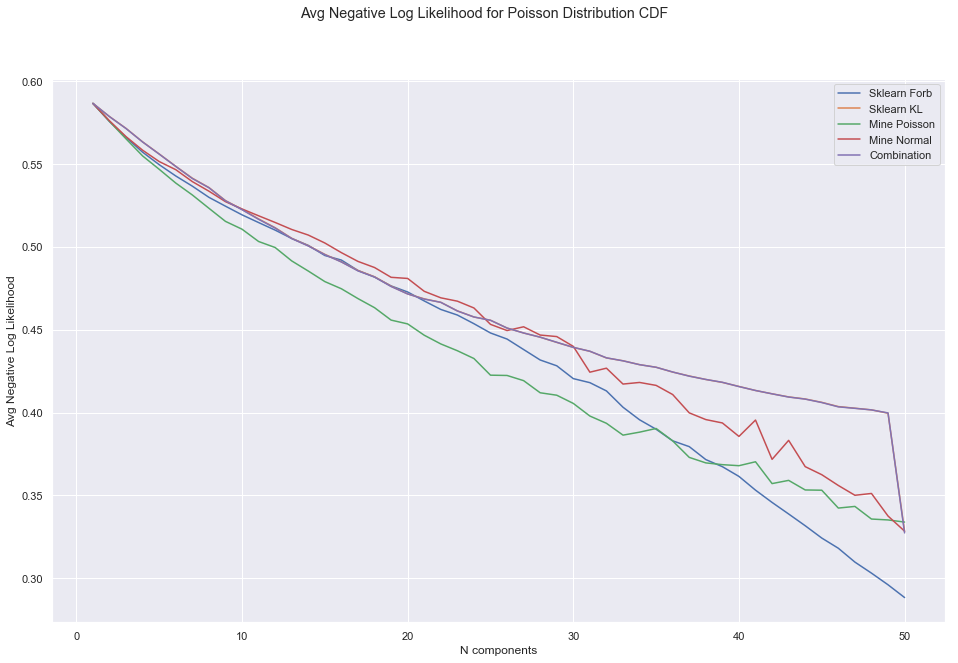

In [281]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn Forb")
ax_1.plot(np.arange(1, 51), 
                  lsk2, label="Sklearn KL")
ax_1.plot(np.arange(1, 51), 
                  lmy, label="Mine Poisson")
ax_1.plot(np.arange(1, 51), 
                  lmyNormal, label="Mine Normal")
ax_1.plot(np.arange(1, 51), 
                  lmy2, label="Combination")
ax_1.legend(loc=0)

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Poisson Distribution CDF')
fig_1.savefig('AverageNegLogLikelihoodForNMFPoisson1CDF.pdf')

In [282]:
n = 10

#### Distribution compared to Sklearn with 10 components

Original Data mean: 1.5126 std: 1.2269642374576368
Tansformation Data : 1.531295559485053 std: 0.6546792832181939


/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


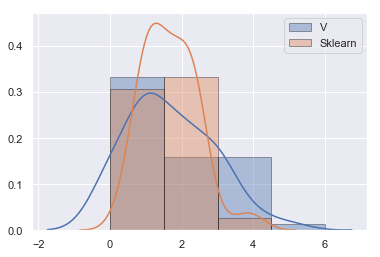

In [283]:
rs = RandomState(76321654)
nmfS = nmfsk(n_components=n,random_state=rs)
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_
sns.set(color_codes=True)
sns.distplot(V[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"), label = 'V')
sns.distplot(Ws.dot(Hs)[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"), label = 'Sklearn')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(Ws.dot(Hs).mean()) + ' std: ' + str(Ws.dot(Hs).std()) )

#### Distribution compared to Mine with 10 components

/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Original Data mean: 1.5126 std: 1.2269642374576368
Tansformation Data : 1.5125999999999997 std: 0.6583717280858967


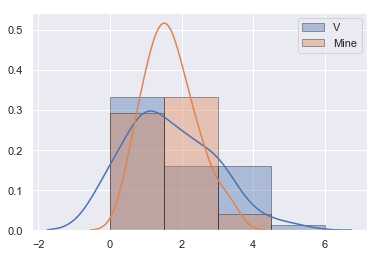

In [284]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'poisson')
W, H = nmfM.fit_transform(V)
bins = (V.max() - V.min())
sns.set(color_codes=True)
sns.distplot(V[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"),  label = 'V')
sns.distplot(W.dot(H)[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"),  label = 'Mine')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

#### Distribution compared to Mine with 10 components with Normal

Original Data mean: 1.5126 std: 1.2269642374576368
Tansformation Data : 1.5303688435572502 std: 0.6431880913558148


/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


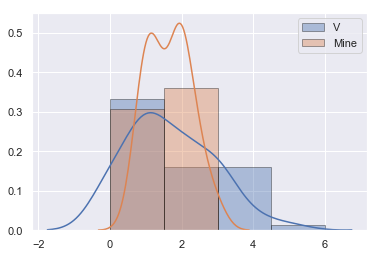

In [285]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gaussian')
W, H = nmfM.fit_transform(V)
bins = (V.max() - V.min())
sns.set(color_codes=True)
sns.distplot(V[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"),  label = 'V')
sns.distplot(W.dot(H)[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"), label = 'Mine')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

#### Distribution compared to Combination with 10 components

Original Data mean: 1.5126 std: 1.2269642374576368
Tansformation Data : 1.5126 std: 0.6105390277850425


/afs/inf.ed.ac.uk/user/s14/s1452704/miniconda3/envs/mlp/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


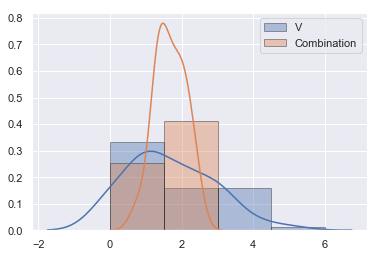

In [286]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'poisson')
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_
sns.set(color_codes=True)
sns.distplot(V[10],bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"), label = 'V')
sns.distplot(W2.dot(H2)[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"), label = 'Combination')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W2.dot(H2).mean()) + ' std: ' + str(W2.dot(H2).std()) )